# 회귀 (Regression) - 지도학습
1. 회귀분석
2. k-Nearest Neighbors (KNN)
3. 서포트벡터머신 (Support Vetor Machine (SVM))
4. 의사결정나무 (Decision Tree)
5. 랜덤포레스트 (Random Forest)

## 회귀 성능 비교 측도
### 평균제곱오차 (Mean squared error; MSE)
- 예측값과 실제값 차이의 제곱의 평균

$$\frac{1}{n}\sum_{i=1}^n(y_i-\hat y_i)^2$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib 설정
plt.rc('font', family = 'AppleGothic')   # Mac
# plt.rc('font', family = 'Malgun Gothic')   # Windows
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

## 예제 데이터 - 보스턴 집값 데이터

In [2]:
# 데이터 불러오기
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data
y = boston.target
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [3]:
X.shape

(506, 13)

### 트레이닝셋과 테스트셋으로 나누기

In [4]:
from sklearn.model_selection import train_test_split

# 자동으로 데이터셋을 분리해주는 함수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
X_train.shape, X_test.shape

((354, 13), (152, 13))

## 1. 선형 회귀분석 (Linear regression)

In [5]:
from sklearn.linear_model import LinearRegression

model_reg = LinearRegression().fit(X_train, y_train)

In [6]:
from sklearn.metrics import mean_squared_error

y_pred_reg = model_reg.predict(X_test)
mse_reg = mean_squared_error(y_test, y_pred_reg)
print("선형 회귀분석 모형 성능: {}".format(round(mse_reg, 3)))

선형 회귀분석 모형 성능: 29.799


## 2. k-Nearest Neighbors (KNN)
- 현 데이터와 가장 가까운 거리에 있는 k개의 데이터들의 출력값들의 평균으로 예측

In [7]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor()
model_knn = model_knn.fit(X_train, y_train)

In [8]:
y_pred_knn = model_knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("KNN 모형 성능: {}".format(round(mse_knn, 3)))

KNN 모형 성능: 59.276


## 3. 서포트 벡터 머신 (Support vector machine; SVM)

### 선형(Linear) SVM

In [9]:
from sklearn.svm import SVR

model_svm = SVR(kernel='linear')
model_svm = model_svm.fit(X_train, y_train)

In [10]:
y_pred_svm = model_svm.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
print("선형 SVM 모형 성능: {}".format(round(mse_svm, 3)))

선형 SVM 모형 성능: 34.302


### 커널(Kernel) SVM

In [11]:
model_svm = SVR(kernel='rbf')
model_svm = model_svm.fit(X_train, y_train)

In [12]:
y_pred_svm = model_svm.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
print("비선형 SVM 모형 성능: {}".format(round(mse_svm, 3)))

비선형 SVM 모형 성능: 83.666


## 4. 의사결정나무 (Decision Tree)
- 여러 독립변수 중 하나의 독립변수를 선택하여 그 변수에 대한 기준값을 정함
- 이 기준값을 기준으로 그룹으로 나누게 됨
- 한 변수에 대해 분류 규칙을 결정하게 되기 때문에 해석이 용이하지만 일반적으로 성능은 그다지 좋지 못함

[Text(235.78849710490465, 212.91, 'X[5] <= 6.945\nmse = 77.162\nsamples = 354\nvalue = 22.602'),
 Text(158.05929666212535, 203.85, 'X[12] <= 14.75\nmse = 33.675\nsamples = 298\nvalue = 19.95'),
 Text(93.4203371934605, 194.79, 'X[5] <= 6.552\nmse = 18.296\nsamples = 187\nvalue = 23.03'),
 Text(47.50792234332425, 185.73, 'X[12] <= 7.57\nmse = 8.746\nsamples = 149\nvalue = 21.721'),
 Text(15.934168937329702, 176.67, 'X[11] <= 393.285\nmse = 3.27\nsamples = 33\nvalue = 24.073'),
 Text(8.27117166212534, 167.60999999999999, 'X[7] <= 1.685\nmse = 2.327\nsamples = 19\nvalue = 23.337'),
 Text(7.298092643051771, 158.55, 'mse = 0.0\nsamples = 1\nvalue = 27.5'),
 Text(9.24425068119891, 158.55, 'X[10] <= 19.95\nmse = 1.439\nsamples = 18\nvalue = 23.106'),
 Text(5.838474114441417, 149.49, 'X[0] <= 0.075\nmse = 0.757\nsamples = 14\nvalue = 23.521'),
 Text(3.892316076294278, 140.43, 'X[7] <= 8.878\nmse = 0.207\nsamples = 4\nvalue = 22.625'),
 Text(2.9192370572207085, 131.37, 'X[0] <= 0.051\nmse = 0.04

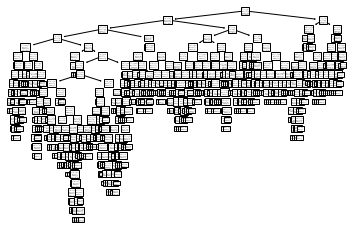

In [13]:
from sklearn import tree

model_tree = tree.DecisionTreeRegressor()
model_tree = model_tree.fit(X_train, y_train)
tree.plot_tree(model_tree)

In [14]:
y_pred_tree = model_tree.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print("의사결정나무 모형 성능: {}".format(round(mse_tree, 3)))

의사결정나무 모형 성능: 26.542


### 가지치기 (Pruning)
- `max_depth`로 최대 깊이 설정

[Text(192.31071428571428, 199.32, 'X[5] <= 6.945\nmse = 77.162\nsamples = 354\nvalue = 22.602'),
 Text(105.62142857142857, 163.07999999999998, 'X[12] <= 14.75\nmse = 33.675\nsamples = 298\nvalue = 19.95'),
 Text(51.81428571428572, 126.83999999999999, 'X[5] <= 6.552\nmse = 18.296\nsamples = 187\nvalue = 23.03'),
 Text(31.885714285714286, 90.6, 'X[12] <= 7.57\nmse = 8.746\nsamples = 149\nvalue = 21.721'),
 Text(15.942857142857143, 54.359999999999985, 'X[11] <= 393.285\nmse = 3.27\nsamples = 33\nvalue = 24.073'),
 Text(7.9714285714285715, 18.119999999999976, 'mse = 2.327\nsamples = 19\nvalue = 23.337'),
 Text(23.914285714285715, 18.119999999999976, 'mse = 2.819\nsamples = 14\nvalue = 25.071'),
 Text(47.82857142857143, 54.359999999999985, 'X[9] <= 208.0\nmse = 8.283\nsamples = 116\nvalue = 21.053'),
 Text(39.85714285714286, 18.119999999999976, 'mse = 42.54\nsamples = 3\nvalue = 28.7'),
 Text(55.8, 18.119999999999976, 'mse = 5.78\nsamples = 113\nvalue = 20.85'),
 Text(71.74285714285715, 90.

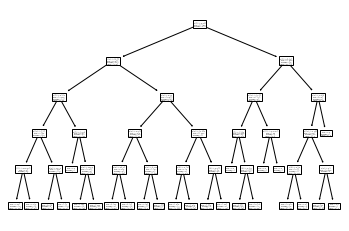

In [17]:
model_tree = tree.DecisionTreeRegressor(max_depth=5)
model_tree = model_tree.fit(X_train, y_train)
tree.plot_tree(model_tree) 

In [18]:
y_pred_tree = model_tree.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
print("가지치기 후의 의사결정나무 모형 성능: {}".format(round(mse_tree, 3)))

가지치기 후의 의사결정나무 모형 성능: 31.736


## 5. 랜덤포레스트 (Random Forest)
- 트리 모형 개수만큼의 예측값들로 평균을 계산하여 최종 에측값으로 결정

In [19]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf = model_rf.fit(X_train, y_train)

In [20]:
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("랜덤포레스트 모형 성능: {}".format(round(mse_rf, 3)))

랜덤포레스트 모형 성능: 19.977


# 머신러닝 모형 성능 끌어올리기 - 하이퍼파라미터 튜닝
### Cross-validation (교차검증)

![](https://miro.medium.com/max/1400/0*KH3dnbGNcmyV_ODL.png)

## 랜덤포레스트 - 하이퍼파라미터 튜닝

In [21]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 후보
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [50, 100, 150],
    'max_features': [0.5, "auto", "sqrt", "log2"],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': [100, 500, 1000]
}

# 그리드 서치
grid_search = GridSearchCV(estimator = model_rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

# 찾은 하이퍼파리미터로 모형 학습
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [50, 100, 150],
                         'max_features': [0.5, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 500, 1000]},
             verbose=2)

In [22]:
# 최적 하이퍼파라미터
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 1000}

In [23]:
# 모형 성능 평가
y_pred_rf = grid_search.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("하이퍼파라미터 튜닝 후 랜덤포레스트 모형 성능: {}".format(round(mse_rf, 3)))

하이퍼파라미터 튜닝 후 랜덤포레스트 모형 성능: 18.666


## SVM - 하이퍼파라미터 튜닝

In [24]:
model_svm = SVR(kernel='rbf')
model_svm = model_svm.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
print("하이퍼파라미터 튜닝 전 SVM 모형 성능: {}".format(round(mse_svm, 3)))

하이퍼파라미터 튜닝 전 SVM 모형 성능: 83.666


In [25]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 후보
param_grid = {
    'C': [10 ** i for i in  range(-1, 6, 1)],
    "epsilon": [0.001, 0.01, 0.1, 1, 10]
}

# 그리드 서치
grid_search = GridSearchCV(estimator = model_svm, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# 찾은 하이퍼파리미터로 모형 학습
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000, 100000],
                         'epsilon': [0.001, 0.01, 0.1, 1, 10]},
             verbose=2)

In [26]:
# 최적 하이퍼파라미터
grid_search.best_params_

{'C': 100000, 'epsilon': 1}

In [27]:
# 모형 성능 평가
y_pred_svm = grid_search.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
print("하이퍼파라미터 튜닝 후의 SVM 모형 성능: {}".format(round(mse_svm, 3)))

하이퍼파라미터 튜닝 후의 SVM 모형 성능: 23.195
